# Derivative of a noisy function

If the fucntion is stochastic/noisy then taking a derivative leads to very noisy functions. 

1. How to meaningfullly deal with such noisy data/functions ? 
2. What role does Ito calculus play in this context?

In [3]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt

# Example data
data = np.random.randn(100)  # Replace with actual data

# 1. Savitzky-Golay Filter
smoothed_data = savgol_filter(data, window_length=11, polyorder=3)
gradient_savgol = np.gradient(smoothed_data)

# 2. Gaussian Filter for Smoothing
# smoothed_data_gaussian = gaussian_filter1d(data, sigma=2)
# gradient_gaussian = np.gradient(smoothed_data_gaussian)

# 3. Gaussian Filter on Gradient
gradient = np.gradient(data)
smoothed_gradient = gaussian_filter1d(gradient, sigma=2)

# 4. Low-pass Filter for Gradient
def lowpass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

gradient_lowpass = lowpass_filter(gradient, cutoff_freq=0.1, fs=1.0)

# 5. Central Difference (Higher-order Differentiation)
def central_diff(data, dx=1):
    return (data[2:] - data[:-2]) / (2 * dx)

gradient_central = central_diff(data)


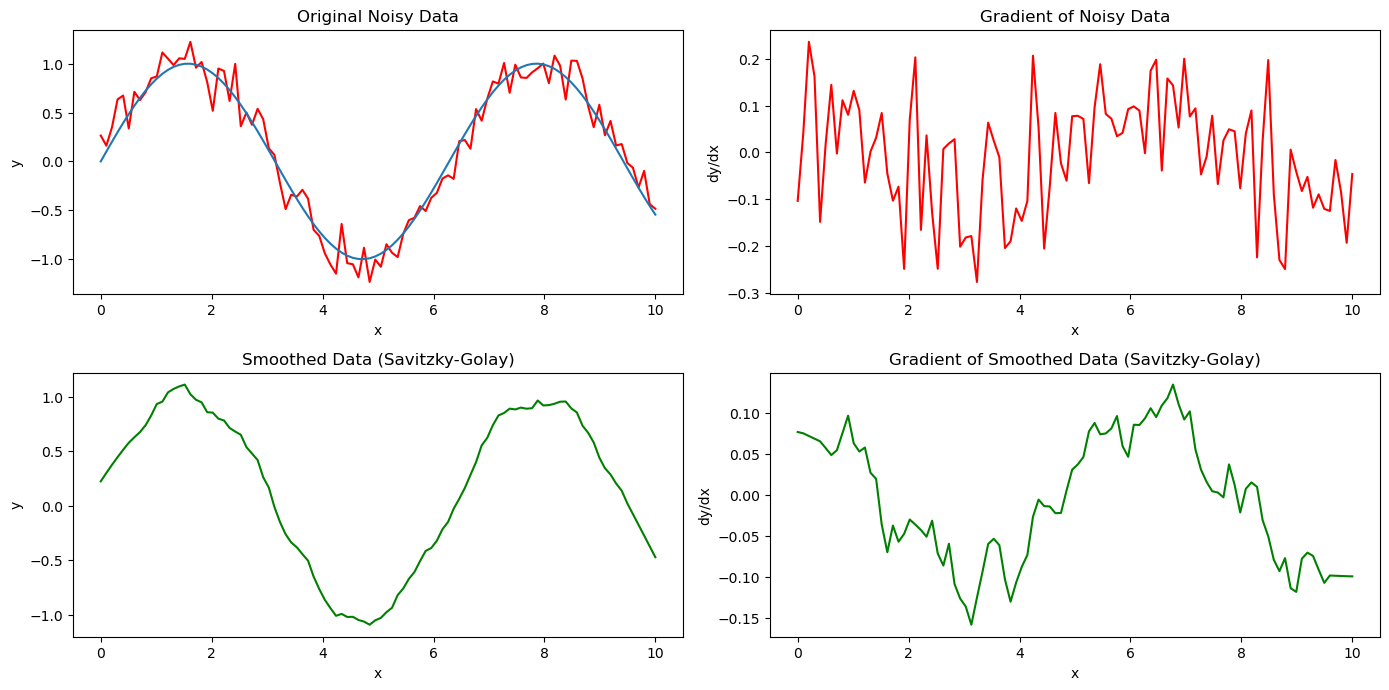

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt

# Generate some noisy data
np.random.seed(0)
x = np.linspace(0, 10, 100)
data = np.sin(x) + 0.15 * np.random.randn(100)  # Original signal with noise

# Compute the gradient of the noisy data
gradient = np.gradient(data)

# Apply Savitzky-Golay filter
smoothed_data_savgol = savgol_filter(data, window_length=11, polyorder=2)
gradient_savgol = np.gradient(smoothed_data_savgol)

# Apply Gaussian filter
# smoothed_data_gaussian = gaussian_filter1d(data, sigma=2)
# gradient_gaussian = np.gradient(smoothed_data_gaussian)

# Apply low-pass filter to gradient
def lowpass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

gradient_lowpass = lowpass_filter(gradient, cutoff_freq=0.1, fs=1.0)

# Central difference method for gradient
def central_diff(data, dx=1):
    return (data[2:] - data[:-2]) / (2 * dx)

gradient_central = central_diff(data)

# Plotting
plt.figure(figsize=(14, 10))

# Original data plot
plt.subplot(3, 2, 1)
plt.plot(x, data, label='Noisy Data', color='r')
plt.plot(x,np.sin(x))
plt.title('Original Noisy Data')
plt.xlabel('x')
plt.ylabel('y')

# Gradient of noisy data plot
plt.subplot(3, 2, 2)
plt.plot(x, gradient, label='Gradient of Noisy Data', color='r')
plt.title('Gradient of Noisy Data')
plt.xlabel('x')
plt.ylabel('dy/dx')

# Smoothed data with Savitzky-Golay filter
plt.subplot(3, 2, 3)
plt.plot(x, smoothed_data_savgol, label='Smoothed with Savitzky-Golay', color='g')
plt.title('Smoothed Data (Savitzky-Golay)')
plt.xlabel('x')
plt.ylabel('y')

# Gradient of smoothed data with Savitzky-Golay filter
plt.subplot(3, 2, 4)
plt.plot(x, gradient_savgol, label='Gradient of Smoothed Data', color='g')
plt.title('Gradient of Smoothed Data (Savitzky-Golay)')
plt.xlabel('x')
plt.ylabel('dy/dx')

# Smoothed data with Gaussian filter
# plt.subplot(3, 2, 5)
# plt.plot(x, smoothed_data_gaussian, label='Smoothed with Gaussian Filter', color='b')
# plt.title('Smoothed Data (Gaussian Filter)')
# plt.xlabel('x')
# plt.ylabel('y')

# Gradient of smoothed data with Gaussian filter
# plt.subplot(3, 2, 6)
# plt.plot(x, gradient_gaussian, label='Gradient of Smoothed Data', color='b')
# plt.title('Gradient of Smoothed Data (Gaussian Filter)')
# plt.xlabel('x')
# plt.ylabel('dy/dx')

plt.tight_layout()
plt.show()


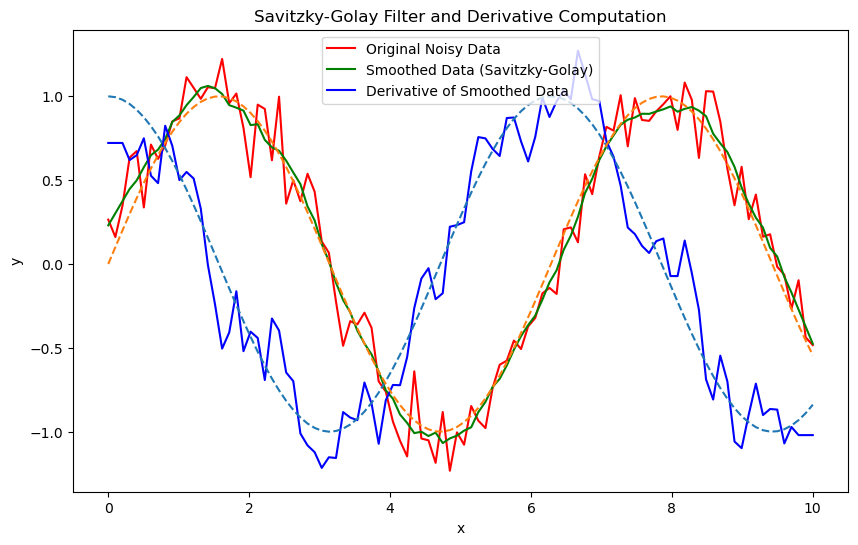

In [38]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Generate some example data (sinusoidal data with noise)
np.random.seed(0)
x = np.linspace(0, 10, 100)
data = np.sin(x) + 0.15 * np.random.randn(100)  # Noisy data

# Step size for differentiation
dN = 0.1  # You can change this value as needed

# Apply Savitzky-Golay filter to smooth the data (order=3, window_length=11)
smoothed_data = savgol_filter(data, window_length=7, polyorder=1)

# Compute the derivative of the smoothed data
derivative_smoothed = np.gradient(smoothed_data, dN)  # dN is the step size

# Plotting
plt.figure(figsize=(10, 6))

# Original noisy data
plt.plot(x, data, label='Original Noisy Data', color='r')

# Smoothed data after applying Savitzky-Golay filter
plt.plot(x, smoothed_data, label='Smoothed Data (Savitzky-Golay)', color='g')

# Derivative of the smoothed data
plt.plot(x, derivative_smoothed, label='Derivative of Smoothed Data', color='b')

plt.plot(x,np.cos(x),linestyle='--')
plt.plot(x,np.sin(x),linestyle='--')

plt.title('Savitzky-Golay Filter and Derivative Computation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
